# K-Nearest Neighbors Classificatie

K-Nearest Neighbors (KNN) is een classificatie algoritme. <br>
Het idee van dit algoritme is dat datapunten met vergelijkbare attributen in de zelfde categorieen zijn in te delen.

![title](Img/nearest_neighbor.gif)

In [231]:
#Importeren van pyton libraries voor dit document
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<br>
<br>
<br>

## Afstand tussen twee punten berekenen - 2D

![title](Img/distance.png)

In [232]:
#[prijs, jaar, maand, rating, lijftijd, is_multiplayer]
Counter_Strike_Source = [19.99, 2004, 11, 88, 0, 1];
Batman_Arkham_Asylum = [19.99, 2010, 3, 91, 0, 0];
Prototype_2 = [39.99, 2012, 7, 76, 17, 0];

In [233]:
#Afstand in twee dimenties:
def distance(game1, game2):
    return ((game1[0] - game2[0])**2 + (game1[1] - game2[1])**2)**0.5

In [234]:
print(distance(Counter_Strike_Source, Batman_Arkham_Asylum))
print(distance(Counter_Strike_Source, Prototype_2))

6.0
21.54065922853802


<br>
<br>
<br>

## Afstand tussen meerdere punten - 3D+

Games vergelijken op basis van prijs en jaar van release is zeer gelimiteerd. Er zijn nog veel meer interessante stukken data die we mee kunnen nemen in de vergelijking, laten we er nog een aantal toevoegen en kijken wat er gebeurd.

We moeten nu de data gaan vergelijken in meerdere dimenties:

![title](Img/points_3D.png)

![title](Img/distanc3d.png)

In [235]:
#Afstand in meerdere dimenties:
def distance(game1, game2):
    distance = 0
    for i in range(len(game1)):
        distance += ((game1[i] - game2[i])**2)
        squared_distance = distance ** 0.5
    return squared_distance

In [236]:
print(distance(Counter_Strike_Source, Batman_Arkham_Asylum))
print(distance(Counter_Strike_Source, Prototype_2))

10.488088481701515
30.23243291566195


<br>
<br>
<br>

## Data met verschillende schalen: Normaliseren

In [237]:
#De dataset uit een .csv halen
df = pd.read_csv("steam_games.csv")

In [238]:
#De jaren van release en de prijzen uit de dataset isoleren
release_dates = df['release_year']
game_prices = df['price']

In [239]:
print('Games kwamen uit tussen: ' + str(release_dates.max()) + ' en ' + str(release_dates.min()))

Games kwamen uit tussen: 2016 en 1970


In [240]:
print('Prijzen liggen tussen: €' + str(game_prices.max()) + ' en €' + str(game_prices.min()))

Prijzen liggen tussen: €99.99 en €0.0


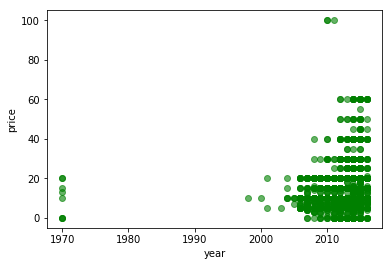

In [241]:
#De scatterplot van jaar en prijzen
plt.scatter(release_dates, game_prices, color = 'g', alpha=0.6 )
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [242]:
def min_max_normalize(lijst):
    minimum = min(lijst)
    maximum = max(lijst)
    normalized = []
    for i in range(len(lijst)):
        normalized.append((lijst[i]-minimum)/(maximum-minimum))
    return normalized

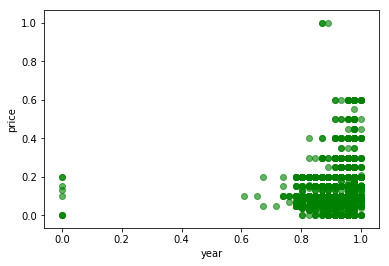

In [243]:
#De scatterplot van jaar en prijzen genormaliseerd
plt.scatter(min_max_normalize(release_dates), min_max_normalize(game_prices), color = 'g', alpha=0.6 )
plt.xlabel('year')
plt.ylabel('price')
plt.show()

<br>
<br>
<br>

## Dataset normaliseren

In [244]:
df.head()

,title,price,release_year,release_month,rating,required_age,is_multiplayer
0,Medieval II: Total War™ Kingdoms,11.99,2007,11,85,0,1
1,Sid Meier's Civilization®: Beyond Earth™,39.99,2014,10,81,0,1
2,Majesty 2,9.99,2009,9,72,0,0
3,Wizorb,2.99,2012,3,81,0,0
4,Air Conflicts: Vietnam,17.99,2013,10,43,0,1


In [245]:
print( 'Er zitten ' + str( (len(df) ) ) + ' games in onze dataset')

Er zitten 2102 games in onze dataset


In [246]:
#Alle data normaliseren   
normalized_prices = min_max_normalize(df['price'])
normalized_release_years = min_max_normalize(df['release_year'])
normalized_release_months = min_max_normalize(df['release_month'])
normalized_required_age = min_max_normalize(df['required_age'])

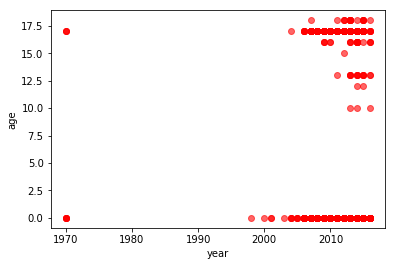

In [247]:
plt.scatter(df['release_year'], df['required_age'], color = 'r', alpha=0.6 )
plt.xlabel('year')
plt.ylabel('age')
plt.show()

In [278]:
game_dataset = {}

for index, row in df.iterrows():
    game = [normalized_prices[index], 
            normalized_release_years[index], 
            normalized_release_months[index], 
            normalized_required_age[index], 
            df['is_multiplayer'][index]]
    
    game_dataset[df['title'][index]] = game

In [249]:
def classify(unknown, dataset, k):
    distances = []
    for title in dataset:
        distance_to_point = distance(dataset[title], unknown)
        distances.append([distance_to_point, title])
    distances.sort()
    neighbors = distances[0:5]
    return neighbors

<br>
<ln>

In [329]:
#Find the 5 nearest neighbors to the unkown game we input
# price, year, month, age, multiplayer
unknown = [.8, .8, .8, .5, 1]
nearest_neighbors = classify(unknown, game_dataset, 5)

for i in range(len(nearest_neighbors)):
    print(str( nearest_neighbors[i][1] ) + ', with distance of: ' + str(nearest_neighbors[i][0]))

Call of Duty®: Black Ops II, with distance of: 0.5120805813752437
Call of Duty®: Advanced Warfare - Gold Edition, with distance of: 0.5233992249370529
Serious Sam Classic: The Second Encounter, with distance of: 0.5478399179222398
Serious Sam 3: BFE, with distance of: 0.5569895065243402
Total War™: ROME II - Emperor Edition, with distance of: 0.5600284091415706


<br>
<br>
<br>

## Rating voorspeller

In [330]:
#We maken een dict met alleen de namen van de game en de rating
labels = {}
for index, row in df.iterrows():
    labels[df['title'][index]] = df['rating'][index]

In [331]:
#Een functie die voor ons de gemiddelde rating van alle neighbors berekend
def ratingcalculator(neighbors, labels):
    rating = 0
    for i in range(len(neighbors)):
        title = neighbors[i][1]
        rating += labels[title]
    return rating / len(neighbors)

In [328]:
print('De rating voor onze game: ' + str(ratingcalculator(nearest_neighbors, labels)))

De rating voor onze game: 81.0


<br>
<br>
<br>

## Accuraatheid van de dataset

In [254]:
from sklearn.model_selection import train_test_split

In [320]:
training_set, validation_set = train_test_split(df, test_size=0.2)

In [321]:
training_data = {}
validation_data = {}
training_labels = {}
validation_labels = {}

for index, row in training_set.iterrows():
    game = [normalized_prices[index], 
            normalized_release_years[index], 
            normalized_release_months[index], 
            normalized_required_age[index], 
            df['is_multiplayer'][index]]
    
    training_data[df['title'][index]] = game
    if(df['rating'][index] > 69):
        training_labels[df['title'][index]] = 1
    else:
        training_labels[df['title'][index]] = 0

for index, row in validation_set.iterrows():
    game = [normalized_prices[index], 
            normalized_release_years[index], 
            normalized_release_months[index], 
            normalized_required_age[index], 
            df['is_multiplayer'][index]]

    validation_data[df['title'][index]] = game
    if(df['rating'][index] > 69):
        validation_labels[df['title'][index]] = 1
    else:
        validation_labels[df['title'][index]] = 0

In [322]:
def find_validation_accuracy(training, training_labels, validation, validation_labels, k):
    num_correct = 0.0
    for title in validation:
        guess = classify_rating(validation[title], training, training_labels, k)
        if(guess == validation_labels[title]):
            num_correct += 1
    return num_correct / len(validation)

In [323]:
def classify_rating(unknown, dataset, labels, k):
    distances = []
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        distances.append([distance_to_point, title])
    distances.sort()
    neighbors = distances[0:k]
    num_good = 0
    num_bad = 0
    for neighbor in neighbors:
        title = neighbor[1]
        if labels[title] == 0:
            num_bad += 1
        elif labels[title] == 1:
            num_good += 1
        if num_good > num_bad:
            return 1
        else:
            return 0

In [326]:
print(find_validation_accuracy(training_data, training_labels, validation_data, validation_labels, 3))

0.5544794188861986
